### LITTLE EYES
#### Meu Primeiro Modelo de Visão Computacional

In [90]:
digit_size = (28, 28, 1)
convnn_acivation = 'relu'
fully_connected_acivation = 'relu'

In [91]:
import tensorflow
from tensorflow.keras import datasets, layers, models, optimizers, Input, Model
from matplotlib import pyplot

### Data Preparation

In [92]:
(train_images, train_labels), (validation_images, validation_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, validation_images = train_images / 255.0, validation_images / 255.0

In [93]:
train_images.shape, validation_images.shape

((60000, 28, 28), (10000, 28, 28))

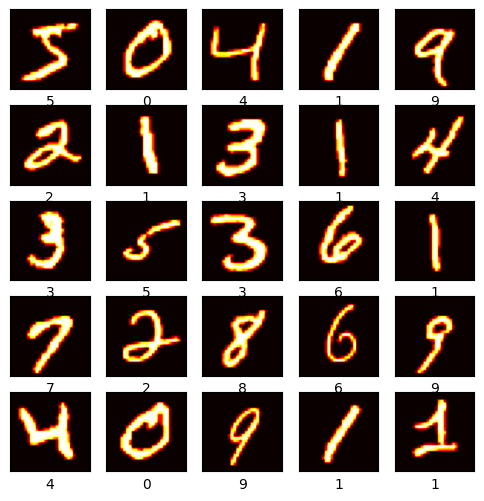

In [94]:
class_names = ['0', '1', '2', '3', '4', '5',
                '6', '7', '8', '9']

pyplot.figure(figsize=(6,6))
for i in range(25):
    pyplot.subplot(5,5,i+1)
    pyplot.xticks([])
    pyplot.yticks([])
    pyplot.grid(False)
    pyplot.imshow(train_images[i], cmap="hot")
    pyplot.xlabel(class_names[train_labels[i]])
pyplot.show()

### Modeling

#### API FUNCIONAL

In [95]:
# CAMADA OCULTA
inputs = Input(shape=digit_size)

# PRIMEIRA CAMADA CONVOLUCIONAL
conv_2d_layer_1 = layers.Conv2D(2, (3, 3), activation=convnn_acivation)
x = conv_2d_layer_1(inputs)

# PRIMEIRA CAMADA MAX POOLING
maxpool_1 = layers.MaxPooling2D((2, 2))
x = maxpool_1(x)

# SEGUNDA CAMADA CONVOLUCIONAL
conv_2d_layer_2 = layers.Conv2D(4, (3, 3), activation=convnn_acivation)
x = conv_2d_layer_2(x)

# SEGUNDA CAMADA MAX POOLING
maxpool_2 = layers.MaxPooling2D((2, 2))
x = maxpool_2(x)

# TERCEIRA CAMADA CONVOLUCIONAL
conv_2d_layer_3 = layers.Conv2D(4, (3, 3), activation=convnn_acivation)
x = conv_2d_layer_3(x)

# TERCEIRA CAMADA MAX POOLING
maxpool_3 = layers.MaxPooling2D((2, 2))
x = maxpool_3(x)

# FLATTEN
flatten_layer = layers.Flatten()
x = flatten_layer(x)

# FULLY CONNECTED HIDDEN LAYER
hidden_layer = layers.Dense(2, activation=fully_connected_acivation)
x = hidden_layer(x)

# OUTPUT LAYER
output_layer = layers.Dense(10)
outputs = output_layer(x)

model_funk = Model(inputs = inputs, outputs = outputs, name = "LittleEyes")

In [96]:
model_funk.summary()

Model: "LittleEyes"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_39 (Conv2D)          (None, 26, 26, 2)         20        
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 13, 13, 2)        0         
 g2D)                                                            
                                                                 
 conv2d_40 (Conv2D)          (None, 11, 11, 4)         76        
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 5, 5, 4)          0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 3, 3, 4)           1

#### API SEQUENCIAL

In [97]:
model = models.Sequential()
model.add(layers.Conv2D(2, (3, 3), activation=convnn_acivation, input_shape=digit_size))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(4, (3, 3), activation=convnn_acivation))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(4, (3, 3), activation=convnn_acivation))
model.add(layers.MaxPooling2D((2, 2)))

In [98]:
# model.summary()

In [99]:
model.add(layers.Flatten())
model.add(layers.Dense(2, activation=fully_connected_acivation))
model.add(layers.Dense(10))

In [100]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 26, 26, 2)         20        
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 13, 13, 2)        0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 11, 11, 4)         76        
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 5, 5, 4)          0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 3, 3, 4)           148       
                                                                 
 flatten_14 (Flatten)        (None, 36)               

In [101]:
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt ,
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(validation_images, validation_labels))

Epoch 1/20
 219/1875 [==>...........................] - ETA: 8s - loss: 2.2614 - accuracy: 0.1102

KeyboardInterrupt: 

313/313 - 1s - loss: 0.4707 - accuracy: 0.8756 - 1s/epoch - 3ms/step


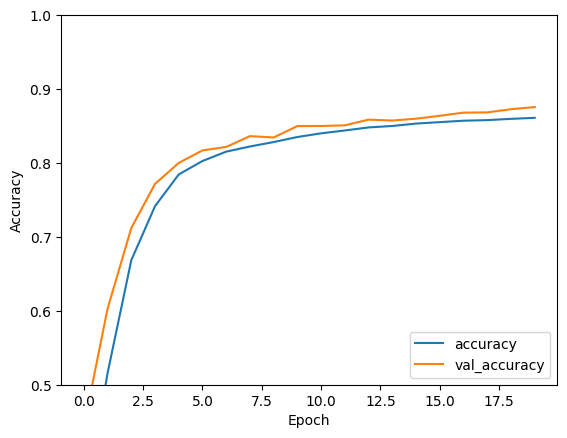

In [ ]:
pyplot.plot(history.history['accuracy'], label='accuracy')
pyplot.plot(history.history['val_accuracy'], label = 'val_accuracy')
pyplot.xlabel('Epoch')
pyplot.ylabel('Accuracy')
pyplot.ylim([0.5, 1])
pyplot.legend(loc='lower right')

validation_loss, validation_acc = model.evaluate(validation_images,  validation_labels, verbose=2)